<a href="https://colab.research.google.com/github/Artcods/Artcods/blob/main/Statistika_tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ANALISIS FAKTOR PENYEBAB OBESITAS DARI NEGARA MEKSIKO, PERU DAN KOLOMBIA**

---

Penelitian ini bertujuan untuk menganalisis faktor – faktor yang dapat
mempangaruhi tingkat obesitas dari negara Meksiko, Peru dan Kolombia berdasarkan kondisi fisik dan kebiasannya. Penulis menggunakan data yang diperoleh dari website resmi kaggle yang diperoleh dari UC Irvine Machine Learning oleh Fabio Mendoza Palechor dan Alexis De la Hoz Manotas  pada tahun 2019 yang berisi 17 atribut dan  2112 record yang diberi label dengan variabel kelas NObesity (Tingkat Obesitas) yang memungkinkan klasifikasi data menggunakan nilai  Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

# **METODE** **PENELITIAN**

1. Identifikasi masalah: Penelitian ini bertujuan untuk mengidentifikasi faktor-faktor yang mempengaruhi tingkat obesitas dengan menggunakan Heatmap korelasi sebagai metode visualisasi data matriks.  Dengan menggunakan pendekatan ini, diharapkan dapat memberikan informasi yang berguna dalam memahami faktor-faktor yang berkontribusi terhadap obesitas sehingga intervensi yang lebih tepat dan efektif bisa dikembangkan guna mencegah dan mengurangi obesitas.

2. Pengumpulan data: Penelitian ini menggunakan dataset yang merupakan hasil survey pada responden di tiga negara, yaitu Meksiko, Peru dan Kolombia yang berhubungan dengan tingkat obesitas individu. Informasi yang terdapat dalam dataset tersebut diperoleh dari survey melalui platform web dimana responden mengevaluasi pola makan serta aspek lainnya terkait kondisi fisik mereka. Data yang digunakan dalam penelitian ini terdiri dari beberapa variabel seperti

3. Preprocessing data: Pada tahap ini dilakukan persiapan data sebelum dilakukan analisis dengan heatmap korelasi. Preprocessing data meliputi pembersihan data, pengubahan data menjadi bentuk yang sesuai dengan kebutuhan analisis, dan penghapusan data yang tidak valid. Pada tahap ini, setiap tabel yang mempunyai data bertipe string/text akan diubah menjadi bentuk numerikal melalui proses label encoding, sehingga masing-masing dari string/text akan menjadi deretan angka yang akan mewakili setiap variasi teks dan setiap tabel yang berisi angka desimal akan dibulatkan.

4. Analisis data: Penelitian ini dilakukan dengan menggunakan metode analisis statistik untuk mengevaluasi faktor-faktor yang mempengaruhi tingkat obesitas. Setelah data dipersiapkan, visualisasi pertama yang dilakukan adalah menggunakan pie/bar charts untuk melihat distribusi data. setelah itu, untuk menganalisis hubungan antara variabel, digunakan heatmap korelasi untuk menampilkan tingkat korelasi antara setiap pasangan variabel.   

5. Hasil dan interpretasi: Setelah dilakukan analisis data, maka dapat dilihat pola data, struktur data, dan korelasi antar data yang terplot dalam bentuk grafik. Hasil analisis kemudian ditafsirkan dan divalidasi dengan data-data yang tersedia dari sumber lain.

6. Kesimpulan: Berdasarkan hasil analisis dan interpretasi data, maka dapat ditarik kesimpulan mengenai faktor-faktor yang mempengaruhi tingkat obesitas.

### **Insight**

1. Korelasi antara frekuensi konsumsi alkohol dan obesity level
2. Korelasi antara frekuensi konsumsi makanan cepat saji dan obesity level
3. Korelasi antara frekuensi konsumsi sayuran dan obesity level
4. Korelasi antara frekuensi konsumsi makanan utama dan obesity level
5. Korelasi antara frekuensi konsumsi perhitungan kalori dan obesity level
6. Korelasi antara frekuensi merokok dan obesity level
7. Korelasi antara frekuensi konsumsi air putih dan obesity level
8. Korelasi antara frekuensi genetik dan obesity level
9. Korelasi antara frekuensi aktifitas fisik sayuran dan obesity level
10. Korelasi antara frekuensi penggunaan teknologi dan obesity level
11. Korelasi antara frekuensi konsumsi snack dan obesity level

Keterangan


---


- **Gender**: Feature, Categorical, "Gender"
- **Age** : Feature, Continuous, "Age"
- **Height**: Feature, Continuous
- **Weight**: Feature Continuous
- **family_history_with_overweight**: Feature, Binary, " Has a family member suffered or suffers from overweight? "

- **FAVC** : Feature, Binary, " Do you eat high caloric food frequently? "
- **FCVC** : Feature, Integer, " Do you usually eat vegetables in your meals? "
- **NCP** : Feature, Continuous, " How many main meals do you have daily? "
- **CAEC** : Feature, Categorical, " Do you eat any food between meals? "
- **SMOKE** : Feature, Binary, " Do you smoke? "
- **CH2O**: Feature, Continuous, " How much water do you drink daily? "
- **SCC**: Feature, Binary, " Do you monitor the calories you eat daily? "
- **FAF**: Feature, Continuous, " How often do you have physical activity? "
- **TUE** : Feature, Integer, " How much time do you use technological devices - **such** as cell phone, videogames, television, computer and others? "

- **CALC** : Feature, Categorical, " How often do you drink alcohol? "
- **MTRANS** : Feature, Categorical, " Which transportation do you usually use? "
- **NObeyesdad** : Target, Categorical, "Obesity level"

### **Requirement Library/Package**


---



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Upload Dataset


---



In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
obesity = pd.read_csv ("https://raw.githubusercontent.com/Artcods/Artcods/main/ObesityDataSet_2112.csv")

### **Explore Data**


---



Male      1068
Female    1043


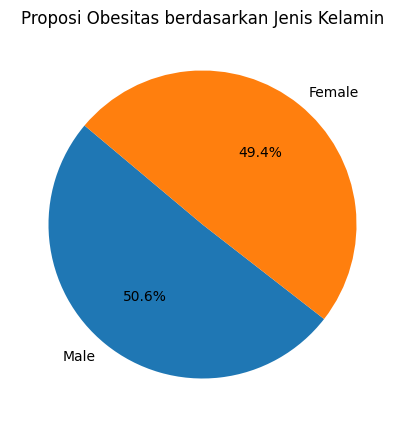

In [7]:
# Menghitung jumlah masing-masing gander
gender_counts = obesity['Gender'].value_counts()

# Menampilkan hasil
print(gender_counts.to_string(index=True, header=False))

# Membuat pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Proposi Obesitas berdasarkan Jenis Kelamin')

# Menampilkan pie chart
plt.show()

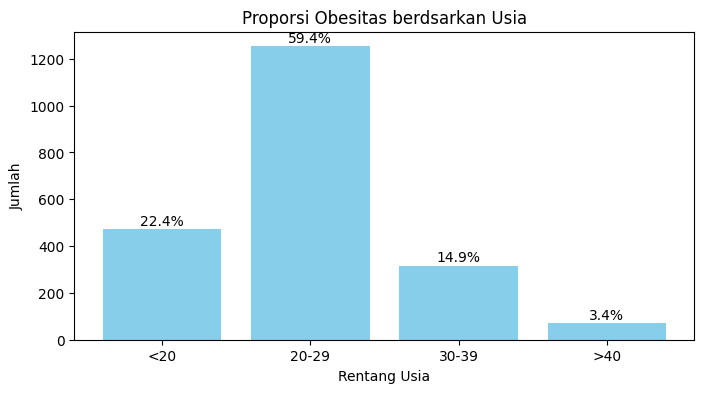

In [8]:
# Mengelompokkan usia ke dalam rentang
bins = [0, 20, 30, 40, float('inf')]
labels = ['<20', '20-29', '30-39', '>40']
obesity['AgeGroup'] = pd.cut(obesity['Age'], bins=bins, labels=labels, right=False)

#Menghitung jumlah masing-masing rentang usia
age_group_counts = obesity['AgeGroup'].value_counts().sort_index()

# Menghitung persentase masing-masing rentang usia
age_group_percentages = (age_group_counts/age_group_counts.sum()) * 100

# Membuat bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')

# Menambahkan persentase sebagai label pada setiap bar
for bar, percentage in zip(bars, age_group_percentages):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.1f}%', ha='center', va='bottom')

#Menambahkan judul dan label sumbu
plt.title('Proporsi Obesitas berdsarkan Usia')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah')

# Menampilkan bar chart
plt.show()

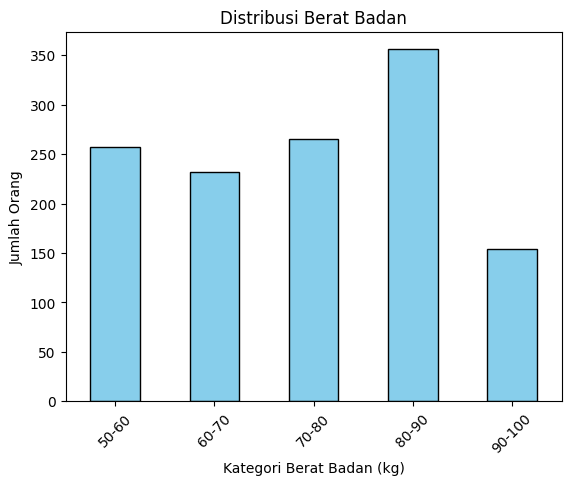

In [5]:
# Mengambil data dari kolom 'Weight'
weights = obesity['Weight']

# Menentukan kategori berat badan
weight_bins = [50, 60, 70, 80, 90, 100]
weight_categories = ['50-60', '60-70', '70-80', '80-90', '90-100']

# Menghitung jumlah orang untuk setiap kategori berat badan
weight_counts = pd.cut(weights, bins=weight_bins, labels=weight_categories, right=False).value_counts().sort_index()

# Membuat bar chart
weight_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Kategori Berat Badan (kg)')
plt.ylabel('Jumlah Orang')
plt.title('Distribusi Berat Badan')
plt.xticks(rotation=45)
plt.show()

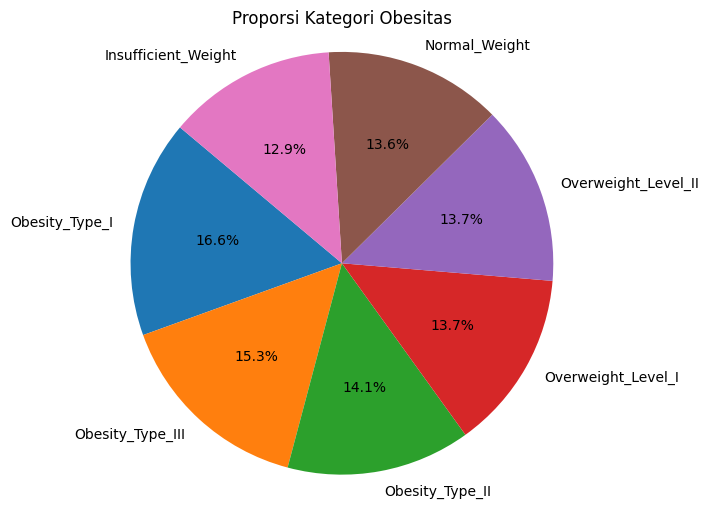

In [6]:
# Menghitung jumlah kasus dalam setiap kategori
kategori_counts = obesity['NObeyesdad'].value_counts()

# Mapping dari label asli ke label deskriptif
label_mapping = {
    '0': 'Insufficient_Weight',
    '1': 'Normal_Weight',
    '2': 'Overweight_Level_I',
    '3': 'Overweight_Level_II',
    '4': 'Obesity_Type_I',
    '5': 'Obesity_Type_II',
    '6': 'Obesity_Type_III',
}

# Mengganti label dengan label deskriptif
descriptive_labels = [label_mapping[str(label)] for label in kategori_counts.index]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(kategori_counts, labels=descriptive_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Kategori Obesitas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Dari visualisasi di atas, penyandang obesitas berdasarkan jenis kelamin cukup seimbang antara perempuan dan laki-laki dengan sedikit selisih persentase. Sementara itu, penyandang obesitas didominasi oleh responden berusia dua puluh sampai dengan dua puluh sembilan tahun, lebih dari setengah dari total responden penyandang obesitas. Rentang usia tersebut merupakan kelompok umur dewasa dan produktif. Tingginya angka obesitas pada rentang usia produktif kemungkinan besar dikarenakan gaya hidup sedenter atau malas bergerak. Hal ini dapat disebabkan oleh rutinitas pekerjaan yang mengharuskan duduk dalam waktu yang lama dalam sehari.

Kembali merujuk pada visualisasi di atas, jumlah keseluruhan responden yang mengalami obesitas mencapai 46% atau hampir separuh total jumlah responden. Setelah dirinci lebih lanjut, proporsi obesitas terbagi kembali menjadi tiga tipe. Jumlah penyandang dari ketiga tipe tersebut memiliki proporsi yang cukup serupa antara satu dan lainnya.

### **Explanatory and Visualization**

---



0.0034421790751232974


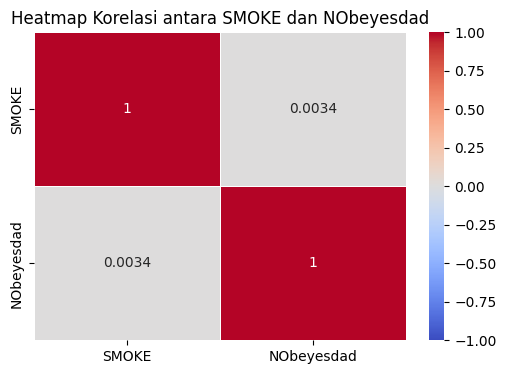

In [ ]:
correlation_smoke = obesity['SMOKE'].corr(obesity['NObeyesdad'])
print(correlation_smoke)

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['SMOKE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara SMOKE dan NObeyesdad')
plt.show()

**Korelasi air putih dengan berat badan (CH2O) hamid**

0.13817078773960842


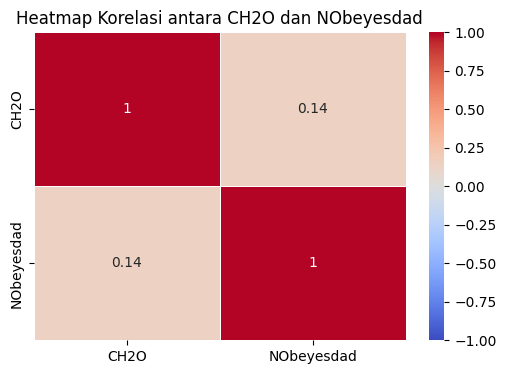

In [ ]:
correlation_ch2o = obesity['CH2O'].corr(obesity['NObeyesdad'])
print(correlation_ch2o)

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['CH2O', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CH2O dan NObeyesdad')
plt.show()

Korelasi antara frekuensi konsumsi makanan tinggi kalori dan obesity level: 0.2477932000502839


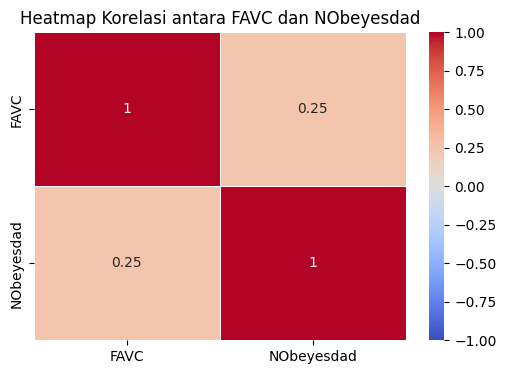

In [ ]:
# Hitung korelasi antara 'FAVC' dan 'NObeyesdad'
correlation = obesity['FAVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi makanan tinggi kalori dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FAVC' dan 'NObeyesdad'
subset = obesity[['FAVC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara FAVC dan NObeyesdad')
plt.show()

Korelasi antara frekuensi konsums makanan utama dan obesity level: 0.020931418594241746


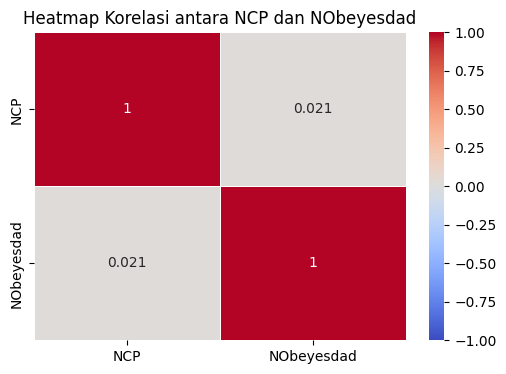

In [ ]:
# Hitung korelasi antara 'NCP' dan 'NObeyesdad'
correlation = obesity['NCP'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsums makanan utama dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'NCP' dan 'NObeyesdad'
subset = obesity[['NCP', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara NCP dan NObeyesdad')
plt.show()

Korelasi antara frekuensi konsumsi sayuran dan obesity level: 0.19570521334325744


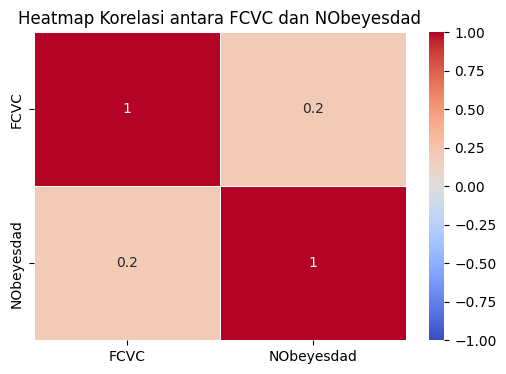

In [ ]:
# Hitung korelasi antara 'CALC' dan 'NObeyesdad'
correlation = obesity['FCVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi sayuran dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FCVC' dan 'NObeyesdad'
subset = obesity[['FCVC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara FCVC dan NObeyesdad')
plt.show()

**Korelasi meminum alkohol (CALC) dengan obesity level**

Korelasi antara frekuensi konsumsi alkohol dan obesity level: 0.1517523222990246


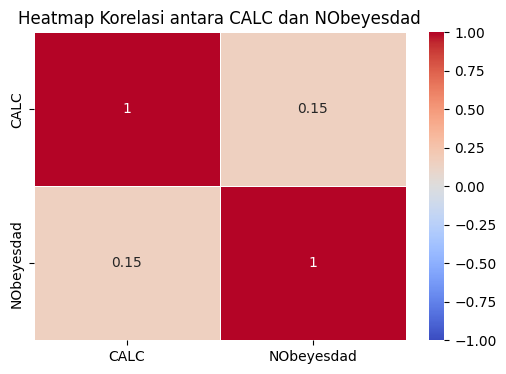

In [ ]:
# Hitung korelasi antara 'CALC' dan 'NObeyesdad'
correlation = obesity['CALC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['CALC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

**Korelasi memantau kalori yang dimakan (SCC) dengan obesity lavel**

Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : -0.19450765594046907


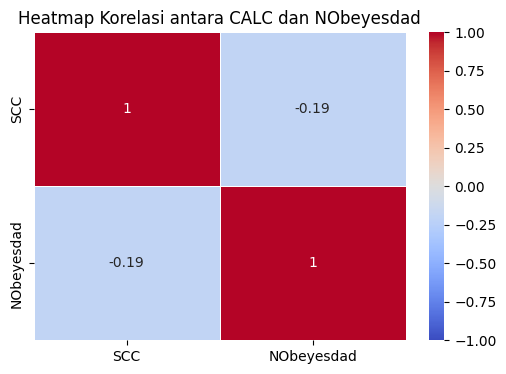

In [ ]:
correlation = obesity['SCC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['SCC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

 **Korelasi menggunakan teknologi (TUE) dengan obesity lavel**

Korelasi antara frekuensi menggunakan teknologi dan obesity level : -0.07952809474559348


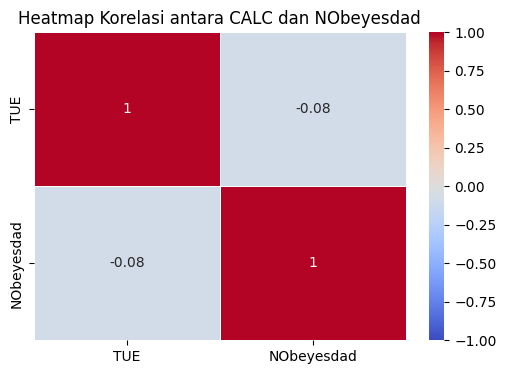

In [ ]:
correlation = obesity['TUE'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi menggunakan teknologi dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['TUE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

**makan** **makanan** **apa** **pun** **di** **antara** **waktu** **makan**(**CAEC**)

Korelasi antara frekuensi konsumsi alkohol dan obesity level: -0.32934971630039905


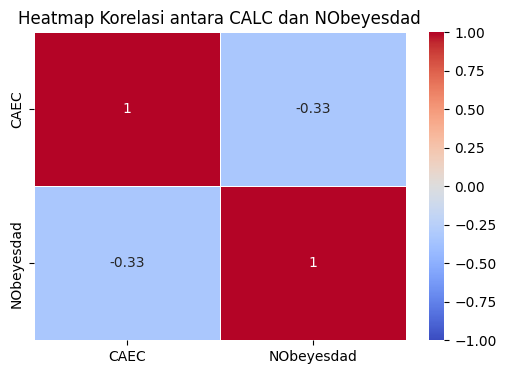

In [ ]:
# Hitung korelasi antara 'CAEC' dan 'NObeyesdad'
correlation = obesity['CAEC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'CAEC' dan 'NObeyesdad'
subset = obesity[['CAEC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

Seberapa sering aktifitas fisik (FAF)

Korelasi antara frekuensi konsumsi alkohol dan obesity level: -0.1971863309546405


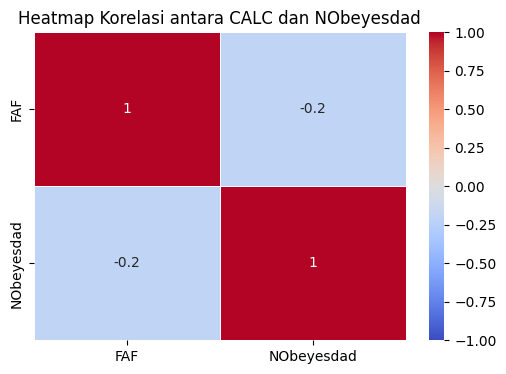

In [ ]:
# Hitung korelasi antara 'FAF' dan 'NObeyesdad'
correlation = obesity['FAF'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FAF' dan 'NObeyesdad'
subset = obesity[['FAF', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

One Sample Kolmogorov-Smirnov Test untuk kolom CALC:
Statistik: 0.01903411267034605, p-value: 0.8547733408587939
Data pada kolom CALC tampak berasal dari distribusi normal (gagal tolak H0)


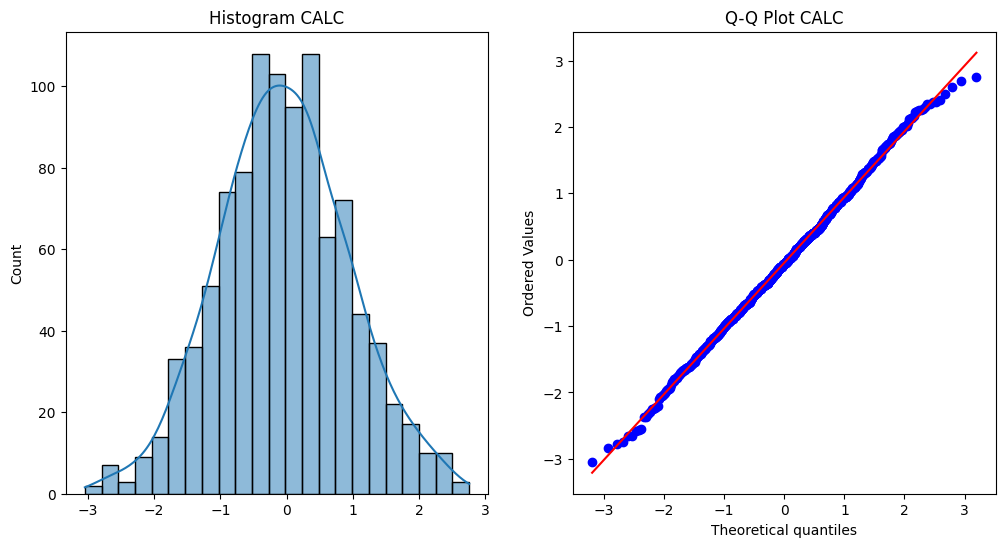

One Sample Kolmogorov-Smirnov Test untuk kolom FAVC:
Statistik: 0.01643370874490957, p-value: 0.9458152160542455
Data pada kolom FAVC tampak berasal dari distribusi normal (gagal tolak H0)


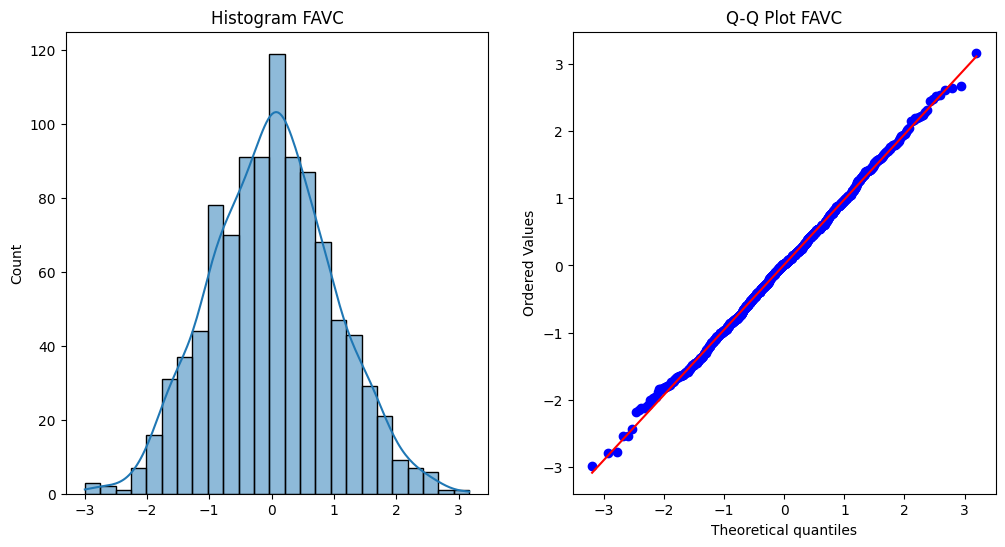

One Sample Kolmogorov-Smirnov Test untuk kolom FCVC:
Statistik: 0.029013779100442894, p-value: 0.3621202398477593
Data pada kolom FCVC tampak berasal dari distribusi normal (gagal tolak H0)


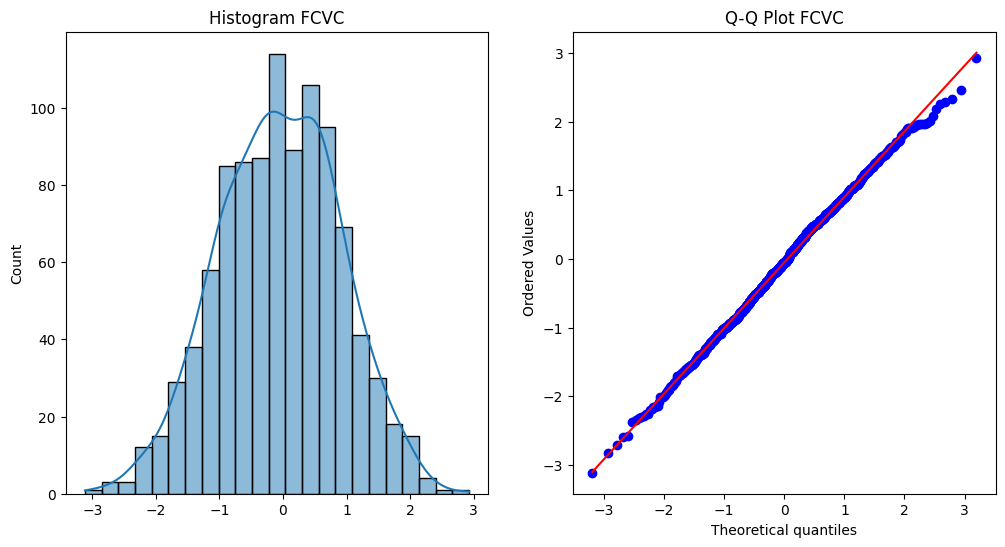

One Sample Kolmogorov-Smirnov Test untuk kolom NCP:
Statistik: 0.019762025568364372, p-value: 0.8220974026228814
Data pada kolom NCP tampak berasal dari distribusi normal (gagal tolak H0)


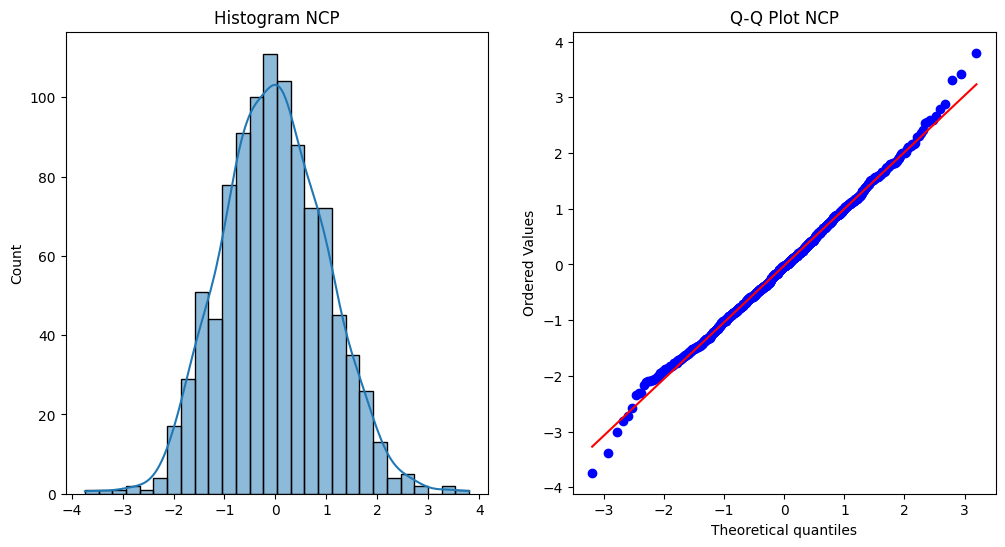

One Sample Kolmogorov-Smirnov Test untuk kolom SCC:
Statistik: 0.018191480580161012, p-value: 0.8890915888656814
Data pada kolom SCC tampak berasal dari distribusi normal (gagal tolak H0)


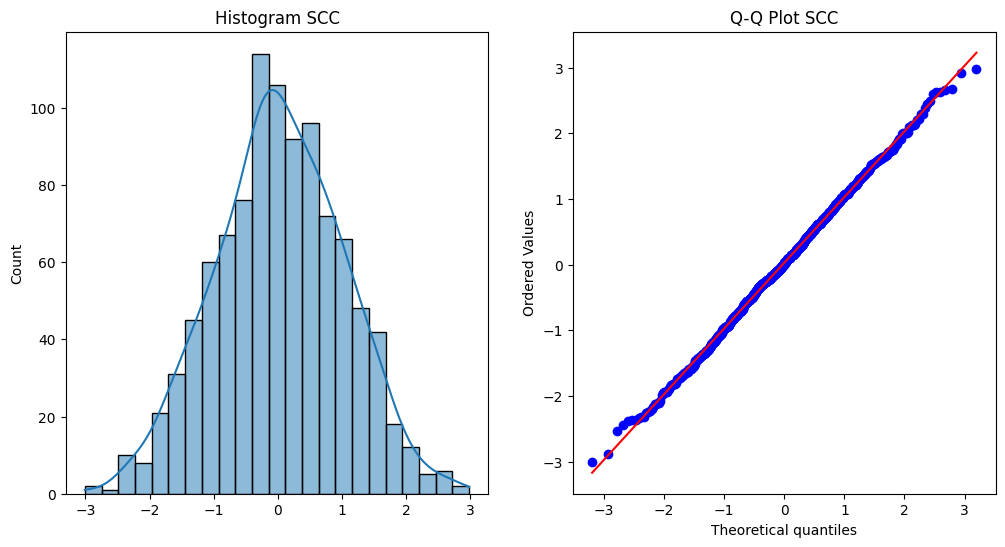

One Sample Kolmogorov-Smirnov Test untuk kolom SMOKE:
Statistik: 0.019905719867078897, p-value: 0.8153622415251772
Data pada kolom SMOKE tampak berasal dari distribusi normal (gagal tolak H0)


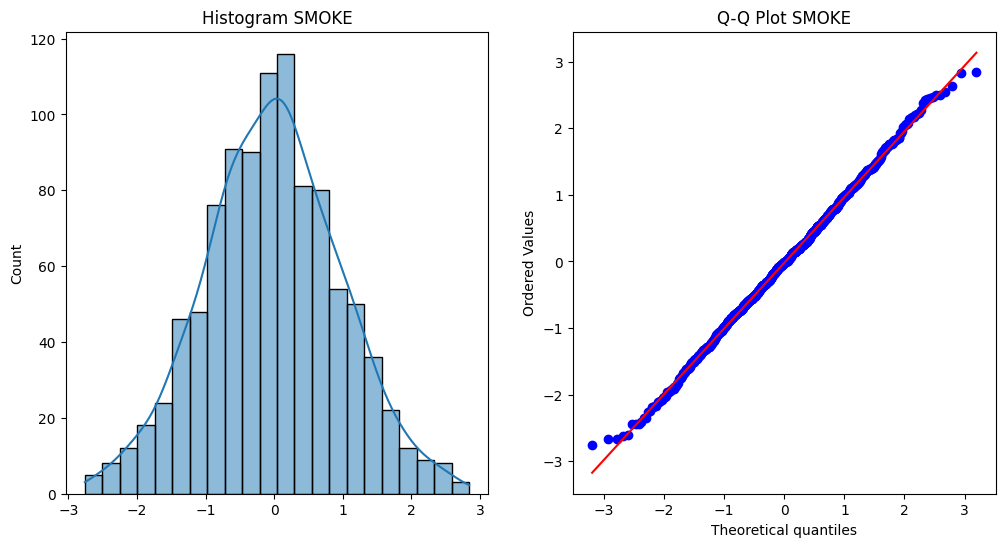

One Sample Kolmogorov-Smirnov Test untuk kolom CH2O:
Statistik: 0.014554231408963503, p-value: 0.9819141402660589
Data pada kolom CH2O tampak berasal dari distribusi normal (gagal tolak H0)


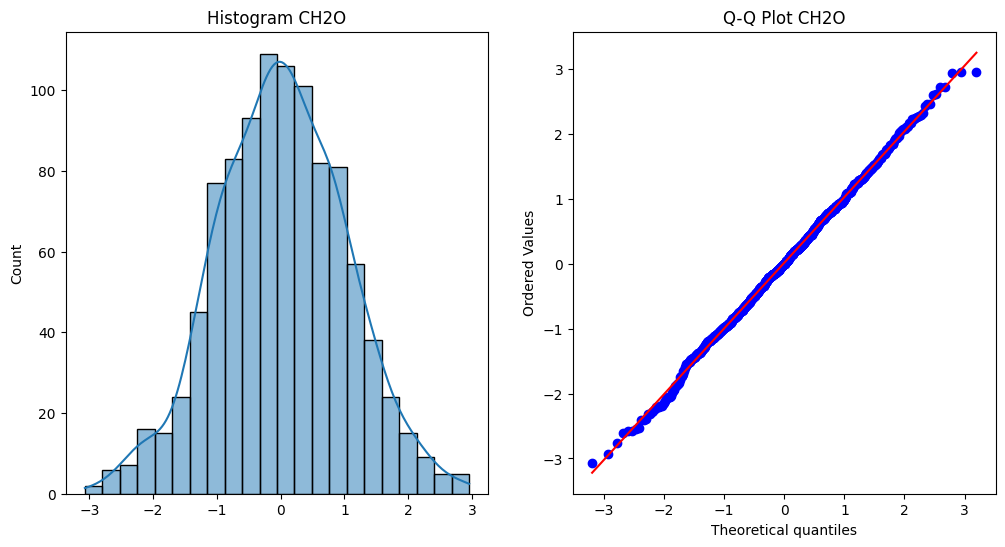

One Sample Kolmogorov-Smirnov Test untuk kolom family_history_with_overweight:
Statistik: 0.025620334169483172, p-value: 0.5193064209030107
Data pada kolom family_history_with_overweight tampak berasal dari distribusi normal (gagal tolak H0)


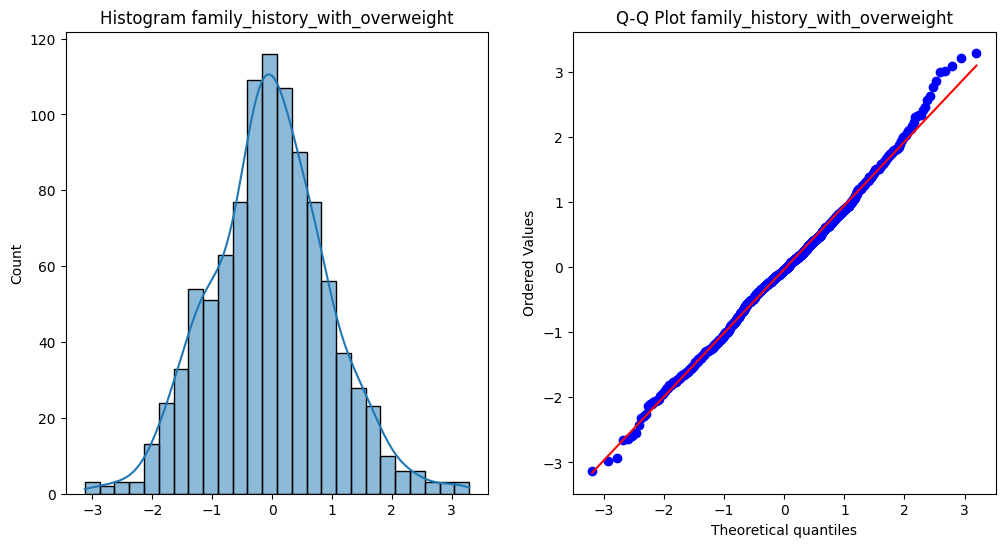

One Sample Kolmogorov-Smirnov Test untuk kolom FAF:
Statistik: 0.017637656409515534, p-value: 0.9092706522990318
Data pada kolom FAF tampak berasal dari distribusi normal (gagal tolak H0)


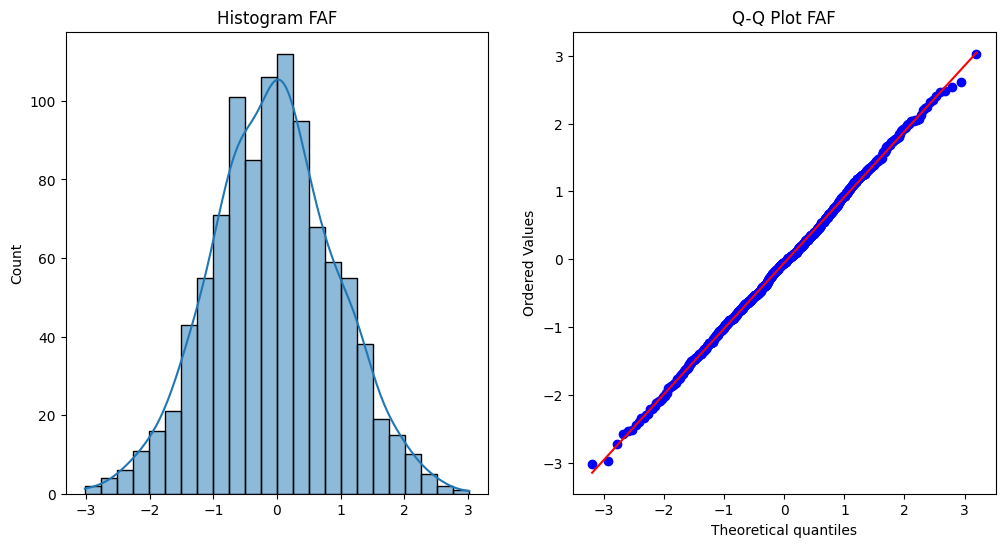

One Sample Kolmogorov-Smirnov Test untuk kolom TUE:
Statistik: 0.021053671423799214, p-value: 0.7588782566923221
Data pada kolom TUE tampak berasal dari distribusi normal (gagal tolak H0)


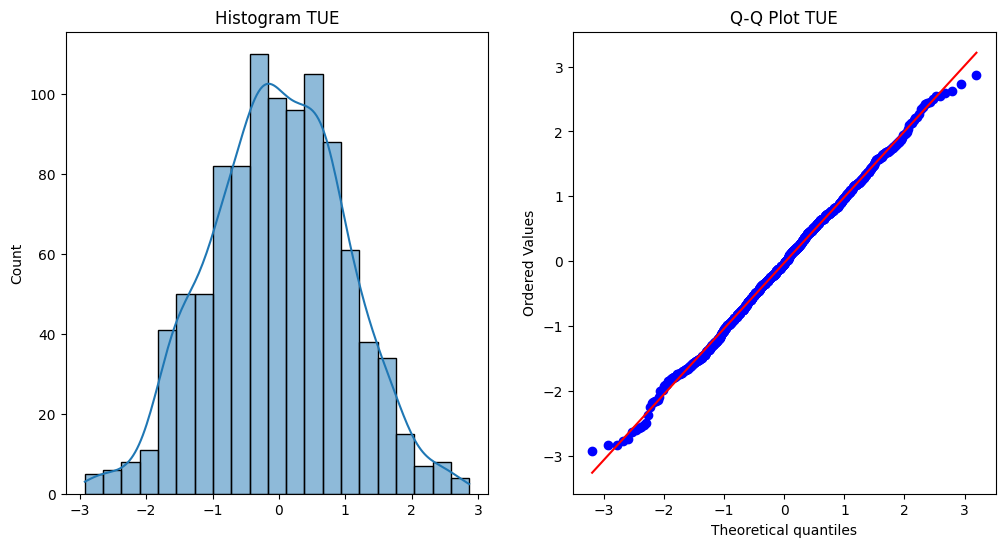

One Sample Kolmogorov-Smirnov Test untuk kolom CAEC:
Statistik: 0.017868230818411268, p-value: 0.9011137550093018
Data pada kolom CAEC tampak berasal dari distribusi normal (gagal tolak H0)


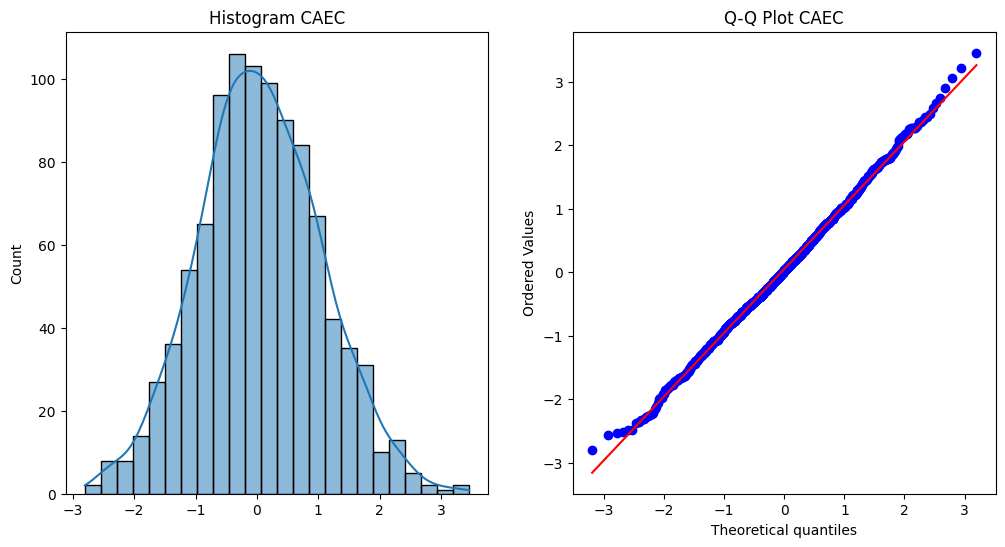

One Sample Kolmogorov-Smirnov Test untuk kolom NObeyesdad:
Statistik: 0.014439366097499962, p-value: 0.9833408200666353
Data pada kolom NObeyesdad tampak berasal dari distribusi normal (gagal tolak H0)


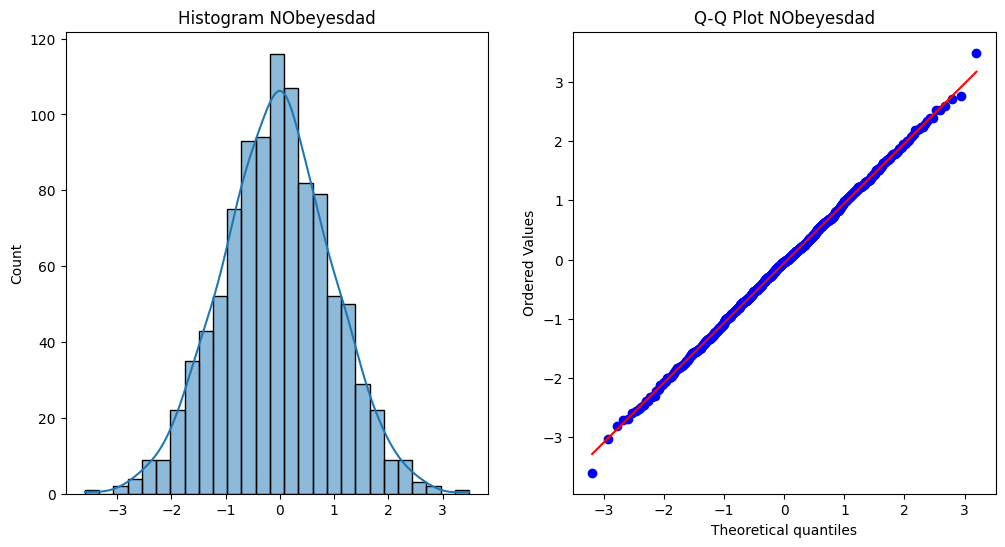

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Contoh membuat DataFrame dengan kolom yang disebutkan
np.random.seed(0)
data_dict = {
    'CALC': np.random.normal(loc=0, scale=1, size=1000),
    'FAVC': np.random.normal(loc=0, scale=1, size=1000),
    'FCVC': np.random.normal(loc=0, scale=1, size=1000),
    'NCP': np.random.normal(loc=0, scale=1, size=1000),
    'SCC': np.random.normal(loc=0, scale=1, size=1000),
    'SMOKE': np.random.normal(loc=0, scale=1, size=1000),
    'CH2O': np.random.normal(loc=0, scale=1, size=1000),
    'family_history_with_overweight': np.random.normal(loc=0, scale=1, size=1000),
    'FAF': np.random.normal(loc=0, scale=1, size=1000),
    'TUE': np.random.normal(loc=0, scale=1, size=1000),
    'CAEC': np.random.normal(loc=0, scale=1, size=1000),
    'NObeyesdad': np.random.normal(loc=0, scale=1, size=1000)
}
obesity = pd.DataFrame(data_dict)

# Fungsi untuk mengecek apakah kolom hanya berisi angka
def is_numeric_column(column):
    try:
        pd.to_numeric(column)
        return True
    except ValueError:
        return False

# Memilih hanya kolom numerik
numeric_columns = [col for col in obesity.columns if is_numeric_column(obesity[col])]

# Iterasi melalui setiap kolom numerik dan melakukan uji normalitas
for col in numeric_columns:
    data = obesity[col].dropna().astype(float).values

    # Uji One Sample Kolmogorov-Smirnov
    stat, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f'One Sample Kolmogorov-Smirnov Test untuk kolom {col}:')
    print(f'Statistik: {stat}, p-value: {p_value}')

    # Interpretasi hasil
    alpha = 0.05
    if p_value > alpha:
        print(f'Data pada kolom {col} tampak berasal dari distribusi normal (gagal tolak H0)')
    else:
        print(f'Data pada kolom {col} tidak berasal dari distribusi normal (tolak H0)')

    # Visualisasi data
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram {col}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot {col}')

    plt.show()
